## Normalized mutual info  
For every epoch - check whether images tended to change classes compared to previous epoch

In [3]:
import pickle
import os
import sys
import numpy as np
from glob import glob
from sklearn.metrics.cluster import normalized_mutual_info_score
import seaborn as sn


In [4]:
def arrange_clustering(images_lists):
    pseudolabels = []
    image_indexes = []
    for cluster, images in enumerate(images_lists):
        image_indexes.extend(images)
        pseudolabels.extend([cluster] * len(images))
    indexes = np.argsort(image_indexes)
    return np.asarray(pseudolabels)[indexes]

In [5]:
clusters = "/home/aogorodnikov/deepclust_afterACAE/clusters"

In [6]:
with open(clusters, "rb") as f:
    b = pickle.load(f, encoding='latin1')

In [ ]:
nmi = []
for num, i in enumerate(b):
    res = normalized_mutual_info_score(
        arrange_clustering(i),
        arrange_clustering(b[num-1]))
    nmi.append(res)
    


### NMI for RGB images deepcluster from 0 epochs

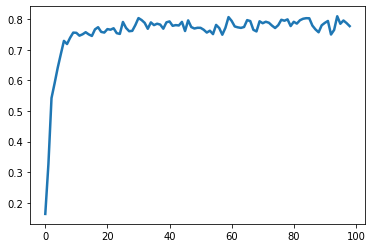

In [10]:
sn.lineplot(x=list(range(0, len(nmi))), y = nmi, palette="tab10", linewidth=2.5)